In [2]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
import torchvision
from torchvision import transforms
import numpy as np
from tqdm import tqdm
from syndata import get_exo_locations
import pandas as pd
from get_syndata import *

In [ ]:
def visualize_data_locations(data,exo_locations):
    _, axes = plt.subplots(nrows=5,ncols=5,figsize=(20,20))

    for i, (row,col) in enumerate(product(range(5),range(5))):
        
        star_circle = plt.Circle( (70, 90 ),
                                      20 ,
                                      fill =False ,color='red')
        
        exo_circle = plt.Circle( (exo_locations[i][0]+3, exo_locations[i][1]+3),
                                     3 ,
                                     fill = False ,color='blue')
        
        axes[row][col].imshow(data[i],cmap='gray',clim=(0,124))
        axes[row][col].add_artist(star_circle)
        axes[row][col].add_artist(exo_circle)
        axes[row][col].set_yticks([])
        axes[row][col].set_xticks([])
        
    _.patch.set_facecolor('#423f3b')
    plt.subplots_adjust(wspace=0,hspace=0)
    plt.show()  

In [ ]:
def visualize_data(data):
    _, axes = plt.subplots(nrows=5,ncols=5,figsize=(20,20))

    for i, (row,col) in enumerate(product(range(5),range(5))):
                
        axes[row][col].imshow(data[i],cmap='gray',clim=(0,124))
        axes[row][col].set_yticks([])
        axes[row][col].set_xticks([])
        
    _.patch.set_facecolor('#423f3b')
    plt.subplots_adjust(wspace=0,hspace=0)
    plt.show()  

In [3]:
class SyntheticDataset(Dataset):
    
    def __init__(self,star:list,exo:list,transform=True):
            
        self.star      = star
        self.exo       = exo
        #self.nothing   = nothing
        self.transform = transform 
        #self.exo_locs  = exo_locs
        
        self.arr      = np.concatenate((exo[0],star[0]))
        self.label    = torch.vstack((exo[1],star[1]))
        
        self.data = [self.arr,self.label]
        
    def __len__(self):
        
        return self.label.size(0)
    
    def __getitem__(self,idx):
        
        sample = self.data[0][idx]
        label  = self.data[1][idx]
        
        if self.transform:
            sample = transforms.Compose([
                               transforms.ToTensor(),
                               transforms.CenterCrop(160),
                           ])(sample)
            
        
        return [sample,label]

In [ ]:
def label_data(arr:np.ndarray,label:str):
    star_label    = torch.Tensor([0,1])
    exo_label     = torch.Tensor([1,0])
    #nothing_label = torch.Tensor([0,0,1])
    
    labelled = []
    
    if label == 'star':
        label_stack = torch.stack((star_label,star_label))
        labelled.append(arr)
            
        for i in range(2,len(arr)):
            label_stack = torch.vstack((label_stack,star_label))
        labelled.append(label_stack)
    
    elif label == 'exo':
        
        label_stack = torch.stack((exo_label,exo_label))
        labelled.append(arr)
        for i in range(2,len(arr)):
            label_stack = torch.vstack((label_stack,exo_label))
        labelled.append(label_stack)
        
    if label == 'nothing':
        
        label_stack = torch.stack((nothing_label,nothing_label))
        labelled.append(arr)
            
        for i in range(2,len(arr)):
            label_stack = torch.vstack((label_stack,nothing_label))
        labelled.append(label_stack)
            
    return labelled

In [ ]:
DIR = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/'
h5_files = glob(os.path.join(DIR,'NIRCAM/**/*.h5'))
data_1441 = h5py.File(h5_files[0],'r')
data_1386 = h5py.File(h5_files[1],'r')
keys_1386 = [x for x in data_1386.keys()]
final_1386 = np.concatenate((np.array(data_1386[keys_1386[0]]),np.array(data_1386[keys_1386[1]])))

for i in range(len(keys_1386)-2):
    
    final_1386 = np.concatenate((final_1386,np.array(data_1386[keys_1386[i+2]])))

In [ ]:
augmented_1386   = np.load(f'{DIR}/augmented/augmented.npy')
#augmented_erased = np.load(f'{DIR}/augmented/augmented_erased_data.npy')
blurred_exo      = np.load(f'{DIR}/augmented/blurred_exo.npy')
#blurred_star     = np.load(f'{DIR}/augmented/blurred_star.npy')
#blurred_nothing  = np.load(f'{DIR}/augmented/blurred_nothing.npy')
noised_exo       = np.load(f'{DIR}/augmented/noised_exo.npy')
noised_star      = np.load(f'{DIR}/augmented/noised_star.npy')
#noised_nothing   = np.load(f'{DIR}/augmented/noised_nothing.npy')
#noised_erased_41 = np.load(f'{DIR}/augmented/noised_1441.npy')

In [ ]:
exo_f250m = np.concatenate((np.load(f'{DIR}/synthetic/exo1_f250m.npy'),np.load(f'{DIR}/synthetic/exo2_f250m.npy')),axis=0)
exo_f300m = np.concatenate((np.load(f'{DIR}/synthetic/exo1_f300m.npy'),np.load(f'{DIR}/synthetic/exo2_f300m.npy')),axis=0)
exo_f356w = np.concatenate((np.load(f'{DIR}/synthetic/exo1_f356w.npy'),np.load(f'{DIR}/synthetic/exo2_f356w.npy')),axis=0)
exo_f410m = np.concatenate((np.load(f'{DIR}/synthetic/exo1_f410m.npy'),np.load(f'{DIR}/synthetic/exo2_f410m.npy')),axis=0)
exo_f444w = np.concatenate((np.load(f'{DIR}/synthetic/exo1_f444w.npy'),np.load(f'{DIR}/synthetic/exo2_f444w.npy')),axis=0)

In [ ]:
#star_erased = np.load(f'{DIR}/synthetic/star_erased.npy')

In [ ]:
exo     = np.concatenate((exo_f250m,exo_f300m,exo_f356w,exo_f410m,noised_exo,blurred_exo,exo_f444w),axis=0)
star    = np.concatenate((final_1386,augmented_1386,noised_star),axis=0)
#nothing = np.concatenate((star_erased,augmented_erased,blurred_nothing,noised_nothing,noised_erased_41),axis=0) 

In [ ]:
exo_locs = get_exo_locations()

In [ ]:
display(exo.shape)
display(star.shape)
#display(nothing.shape)

In [ ]:
np.random.shuffle(exo)
np.random.shuffle(star)
#np.random.shuffle(nothing)

In [ ]:
train_star    = star[:int(len(star)*0.9)]
train_exo     = exo[:int(len(exo)*0.9)]
#train_nothing = nothing[:int(len(nothing)*0.9)]

test_star     = star[int(len(star)*0.9):]
test_exo      = exo[int(len(exo)*0.9):]
#test_nothing  = nothing[int(len(nothing)*0.9):]

In [ ]:
train_star_labelled    = label_data(train_star,label='star')
train_exo_labelled     = label_data(train_exo,label='exo')
#train_nothing_labelled = label_data(train_nothing,label='nothing')

test_star_labelled     = label_data(test_star,label='star')
test_exo_labelled      = label_data(test_exo,label='exo')
#test_nothing_labelled  = label_data(test_nothing,label='nothing')

In [14]:
#train_star, train_exo, test_star, test_exo = get_train_test()

In [13]:
#train_star_labelled, train_exo_labelled, test_star_labelled, test_exo_labelled = get_labelled_data(train_star, train_exo, test_star, test_exo)

In [7]:
train_dataset = SyntheticDataset(star=train_star_labelled,exo=train_exo_labelled)
test_dataset = SyntheticDataset(star=test_star_labelled,exo=test_exo_labelled)

In [8]:
train_dataloader = DataLoader(train_dataset,batch_size=512,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=512,shuffle=True)

In [9]:
_,train_samples = next(enumerate(train_dataloader))
_,test_sample = next(enumerate(test_dataloader))

In [ ]:
# Visualize

In [ ]:
#new_locs = [] 
#for x,y in exo_locs:
#    x_new, y_new = x-80,y-80
#    new_locs.append((x_new,y_new))

In [10]:
train_stack = torch.concat((train_samples[0][0],train_samples[0][1]))
test_stack  = torch.concat((test_sample[0][0],test_sample[0][1]))
for i in range(2,25):
    
    train_stack = torch.concat((train_stack,train_samples[0][i]),axis=0)
    test_stack = torch.concat((test_stack,test_sample[0][i]),axis=0)


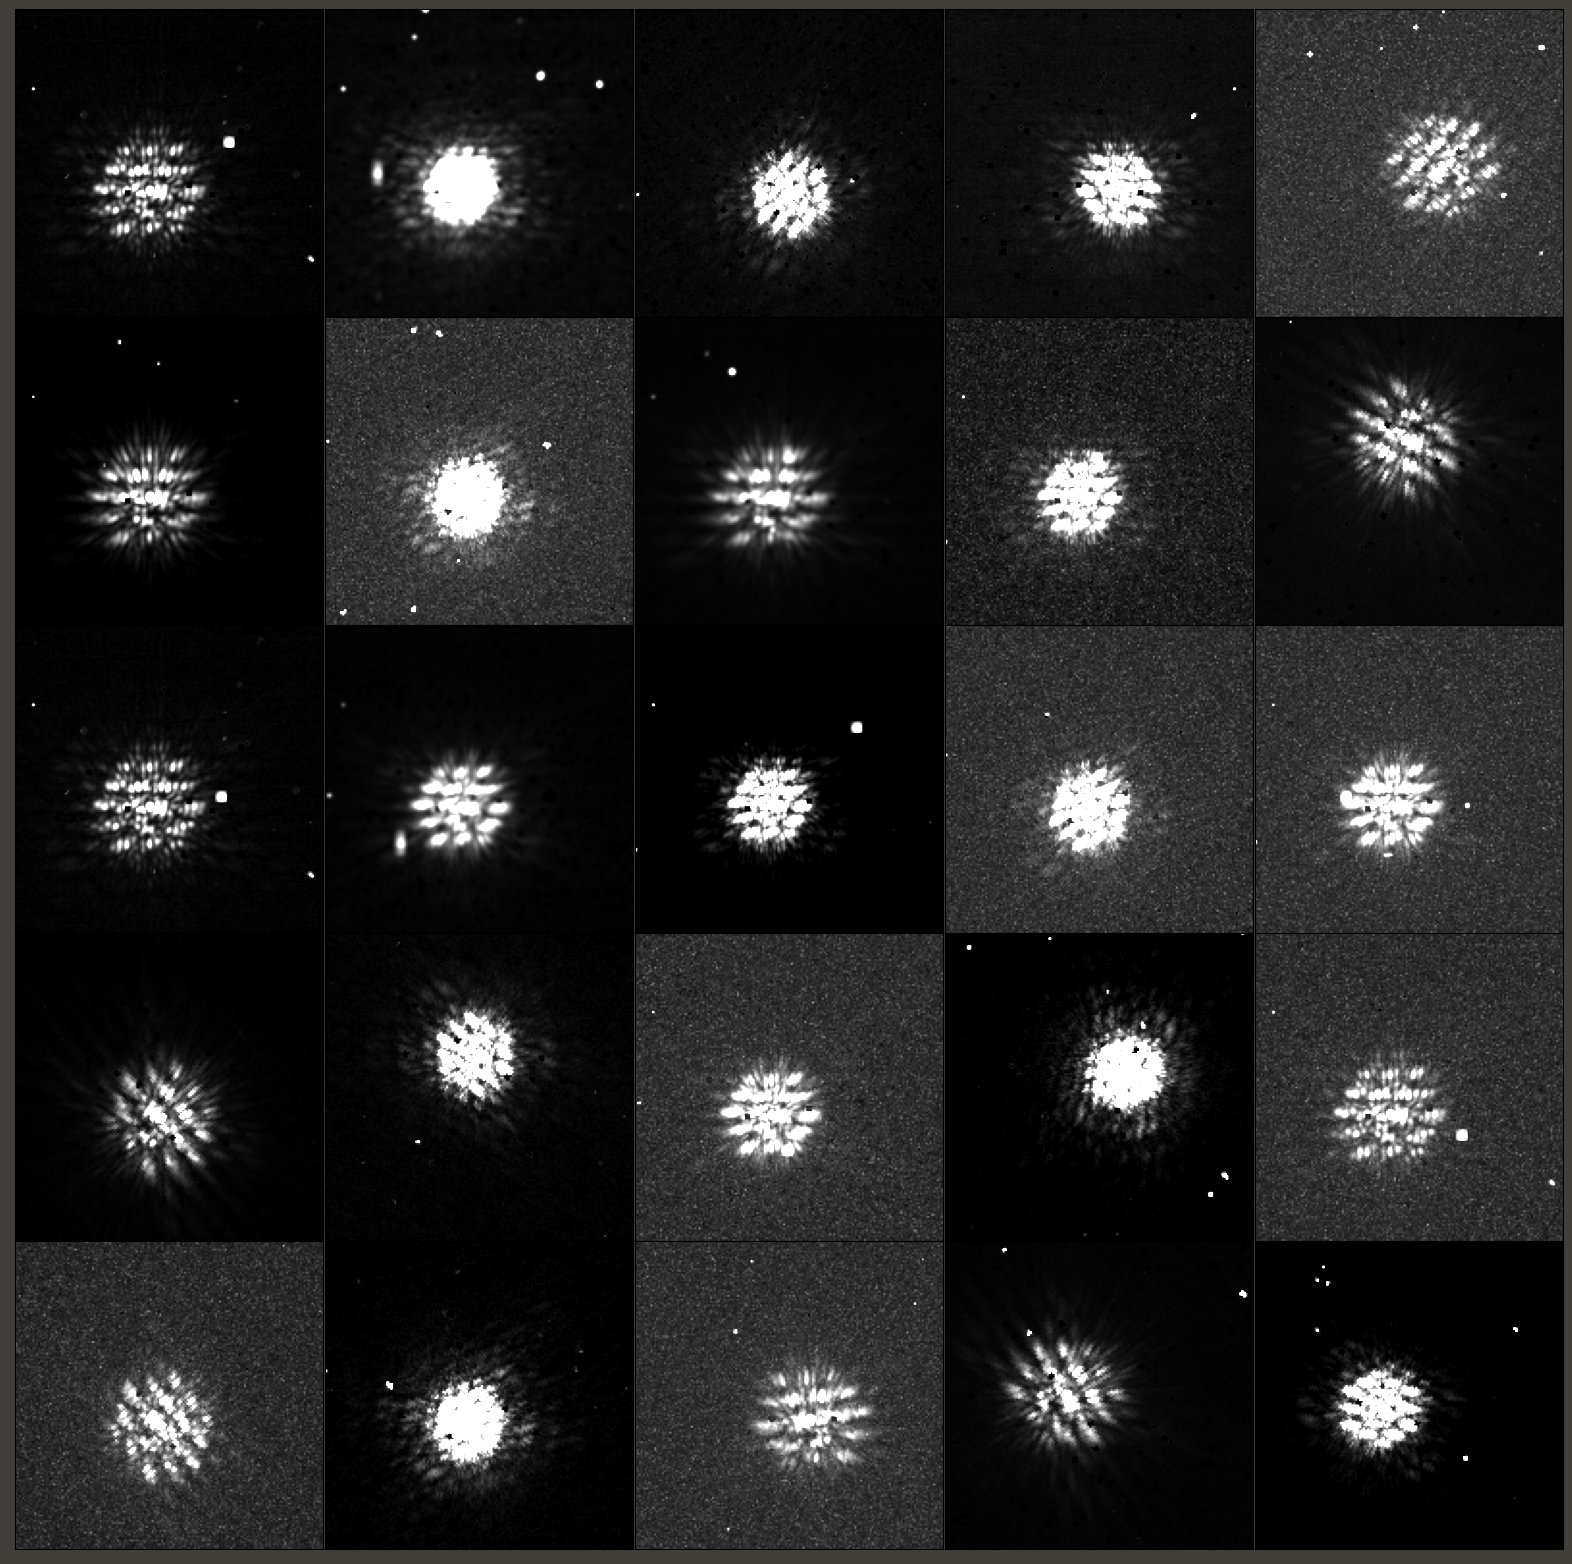

In [11]:
visualize_data(train_stack)

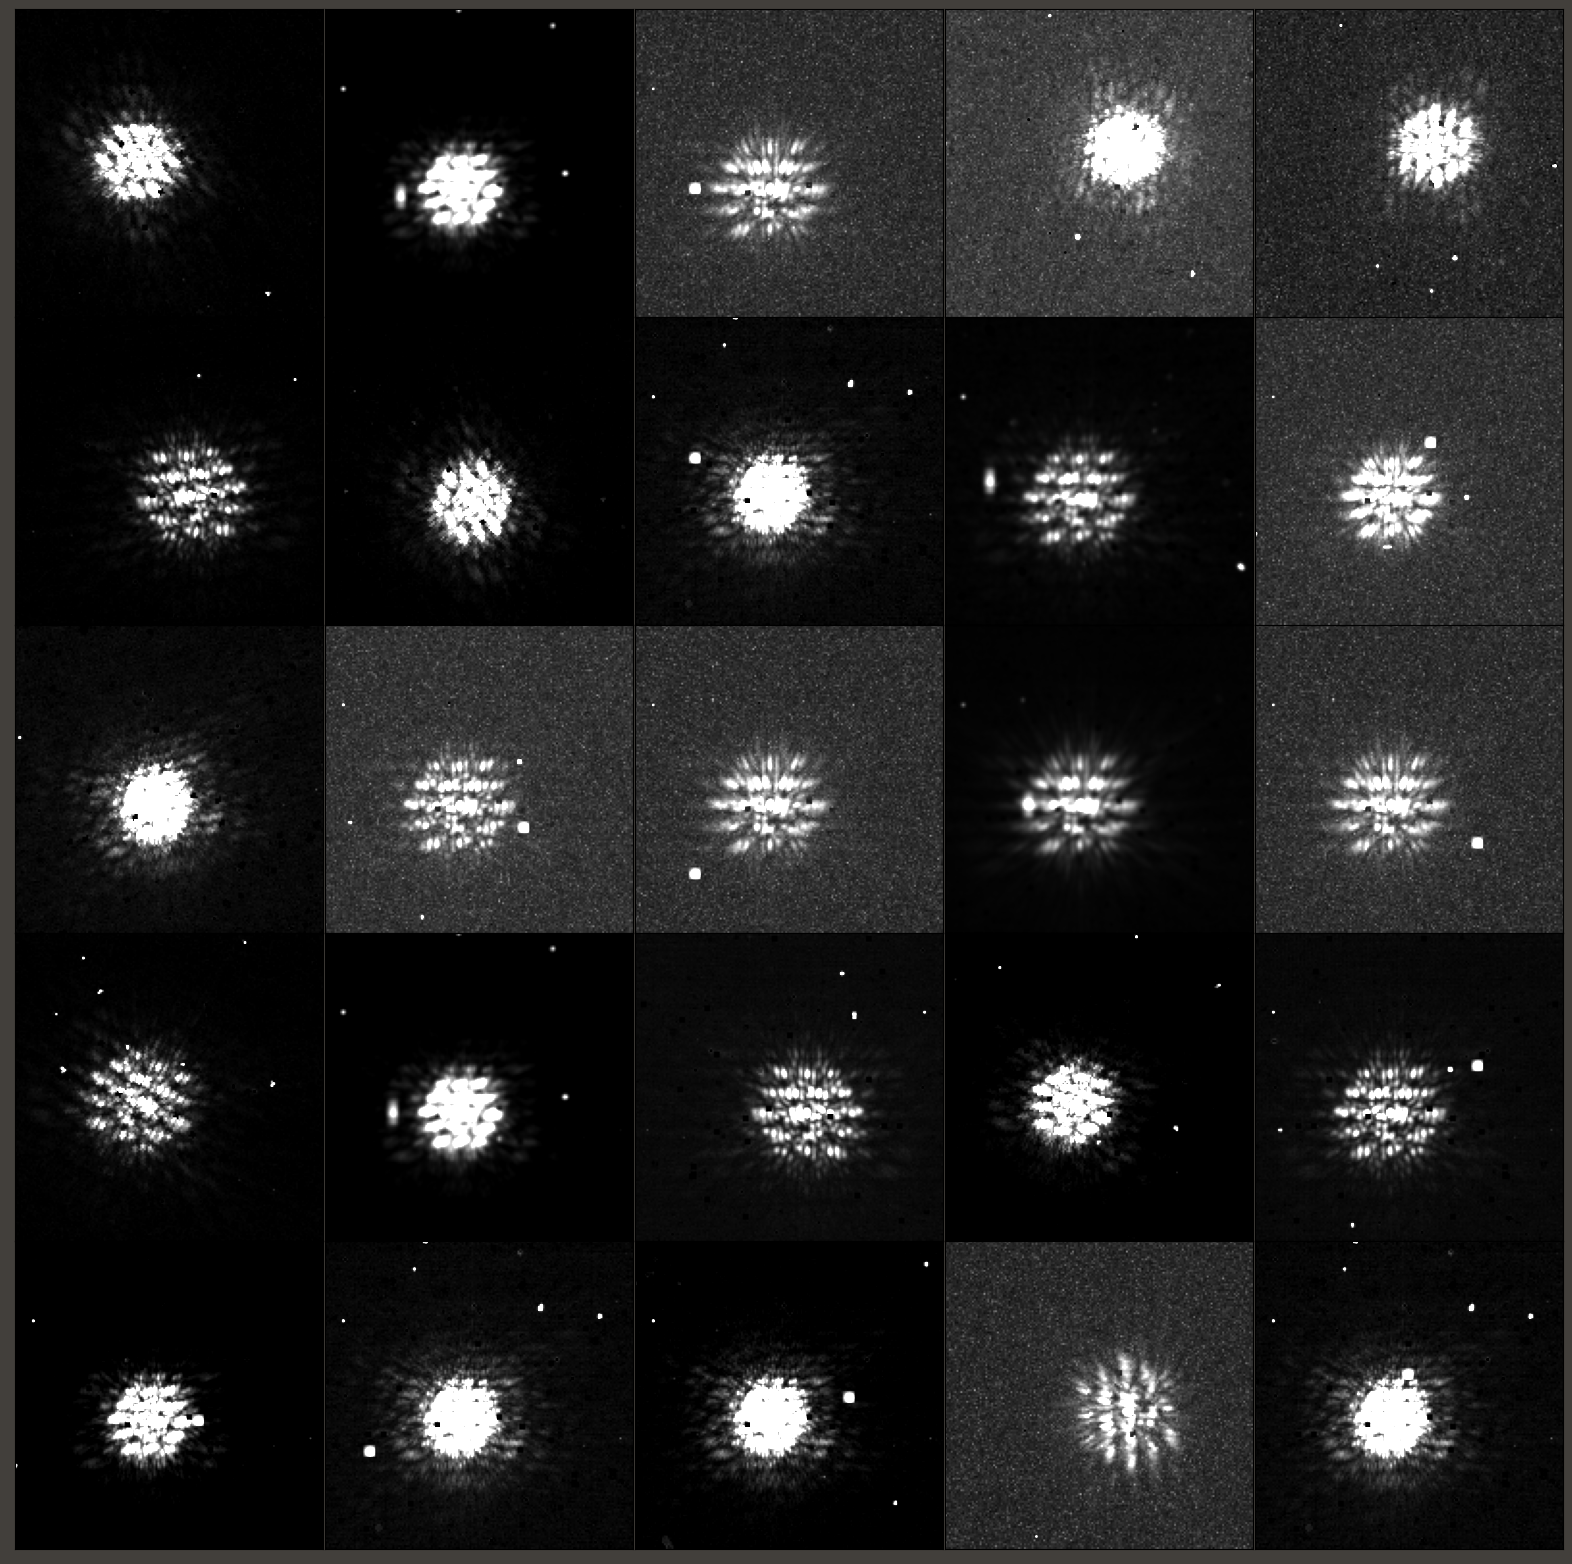

In [12]:
visualize_data(test_stack)

# Conv Calculater

In [ ]:
def calculate_conv_dims(input_size,paddings:list,kernels:list,strides:list,maxpool:list):
    
    outputs = []
    outputs.append(input_size)
    for i in range(len(paddings)):
        
        output_size = (input_size + (2*paddings[i]) - (kernels[i] - 1) - 1)/strides[i] + 1
        if maxpool[i] != 0:
            print('0')
            output_size = (output_size  + (2*paddings[i]) - (maxpool[i]-1)-1)/2 +1
        
        outputs.append(int(output_size))
        input_size = output_size
        
    print(outputs)
    return outputs

In [ ]:
kernels_forward = [3,3,3,3,3,3,3,3,3]
paddings_forward= [0,0,0,0,0,0,0,0,0]
strides_forward = [1,1,1,2,1,1,1,2,1]
maxpool = [0,0,0,0,0,0,0,0,0]

In [ ]:
convdim_outputs = calculate_conv_dims(160,paddings_forward,kernels_forward,strides_forward,maxpool)

In [ ]:
class Exonet(nn.Module):
    
    def __init__(self,convdim_outputs:list,kernels:list,strides:list):
        
        super(Exonet,self).__init__()
        
        self.convdim = convdim_outputs
        self.kernels = kernels
        self.strides = strides
        self.C       = 8 
        
        self.exonet  = nn.Sequential(
                        
            nn.Conv2d(in_channels=1,out_channels=self.C,stride=strides[0],kernel_size=kernels[0]), #1
            nn.ReLU(),
            
            nn.Conv2d(in_channels=self.C,out_channels=self.C,stride=strides[1],kernel_size=kernels[1]), #2
            nn.ReLU(),
            
            #nn.MaxPool2d(kernel_size=3,stride=2),
            
            nn.Conv2d(in_channels=self.C,out_channels=self.C,stride=strides[2],kernel_size=kernels[2]), #3
            nn.ReLU(),
            
            nn.Conv2d(in_channels=self.C,out_channels=self.C*2,stride=strides[3],kernel_size=kernels[3]), #4 
            nn.ReLU(),
            
            #nn.MaxPool2d(kernel_size=3,stride=2),
            
            nn.Conv2d(in_channels=self.C*2,out_channels=self.C*2,stride=strides[4],kernel_size=kernels[4]), #5
            nn.ReLU(),
            
            nn.Conv2d(in_channels=self.C*2,out_channels=self.C*2,stride=strides[5],kernel_size=kernels[5]), #6
            nn.ReLU(),
            
            nn.Conv2d(in_channels=self.C*2,out_channels=self.C*2,stride=strides[6],kernel_size=kernels[6]), #7
            nn.ReLU(),
            
            nn.Conv2d(in_channels=self.C*2,out_channels=self.C*2,stride=strides[7],kernel_size=kernels[7]), #8
            nn.ReLU(),
            
            nn.Conv2d(in_channels=self.C*2,out_channels=self.C*2,stride=strides[8],kernel_size=kernels[8]), #9
            nn.ReLU(),
        
        ) 
        
        self.linear = nn.Sequential(
        
                nn.Linear((self.C*2)*convdim_outputs[-1]**2,4096),
                nn.ReLU(),
                nn.Linear(4096,1024),
                nn.ReLU(),
                nn.Linear(1024,2),
                #nn.Sigmoid()
                nn.Softmax()
        )
        
        
    def forward(self,x):
        
        x = self.exonet(x)
        #print(x.shape)
        x = x.view(x.size(0),-1)
        
        x = self.linear(x)
        
        return x
        

In [ ]:
#device = torch.device("cuda:0, 3" if torch.cuda.is_available() else "cpu") ## specify the GPU id's, GPU id's start from 0.
#device = torch.device("cuda:0" if (torch.cuda.is_available() and 1 > 0) else "cpu")
#model = Exonet(convdim_outputs,kernels_forward,strides_forward)
model  = torch.load('model1.pt')
#model  = nn.DataParallel(model,device_ids = [0, 1, 2, 3])
#model = model.to(device)
model = model.to(f'cuda:{model.device_ids[0]}')

In [ ]:
#device = torch.device("cuda:0" if (torch.cuda.is_available() and 1 > 0) else "cpu")
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4) 
loss_fn = nn.CrossEntropyLoss()

In [ ]:
def train(model,dataloader,optimizer,device,loss_fn,EPOCH=30):
    
    with tqdm(total = len(dataloader) * EPOCH) as tt:
        
        model.train()
        
        for epoch in range(EPOCH):
            
            total_loss, batch_count = 0, 0
            
            for idx,(batch,label) in enumerate(dataloader):
                
                batch  = batch.float().to(f'cuda:{model.device_ids[0]}')
                label  = label.float().to(f'cuda:{model.device_ids[0]}')
                
                output = model(batch)
                
                loss = loss_fn(label,output)
                
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                total_loss += loss.item()
                batch_count += 1
                tt.update()
                
            total_loss = total_loss / batch_count
            print(f'{total_loss}')

In [ ]:
#train(model=model,dataloader=train_dataloader,optimizer=optimizer,loss_fn=loss_fn,device=device,EPOCH=20)

In [ ]:
dataset = enumerate(test_dataloader)

In [ ]:
_,test_sample = next(dataset)

In [ ]:
results = model(test_sample[0].float().to(f'cuda:{model.device_ids[0]}'))

# Test the Model

In [ ]:
def test_(test_loader,model):
    logs = {}
    false_ = []
    
    with torch.no_grad():
        correct = 0
        incorrect = 0
        total = 0
        model.eval()
        arr = torch.randn((1,160,160)).to(f'cuda:{model.device_ids[0]}')
        
        for idx, (images,target) in enumerate(test_loader):
            
            images = images.float().to(f'cuda:{model.device_ids[0]}')
            target = target.float().to(f'cuda:{model.device_ids[0]}')
            
            outputs = model(images)
            predicted = torch.floor(outputs)
            
            where = torch.argwhere(torch.abs(predicted - target))
            
            for i in range(len(where)):
                
                arr = torch.vstack((arr,images[where[i][0]]))
            
            incorrect += torch.sum(torch.abs(predicted-target))
            
            correct += torch.abs(len(target) - incorrect)
            
            total += len(target) 
            
        print('Incorrect:',int(incorrect))
        print('Correct:',int(correct))
        print('Total:',total)
        print('Test Accuracy of the model: {} %'.format(100 * correct / total))
        #logs['accuracy'] = accuracy
        
        
    return arr[1:]
        

In [ ]:
false_classes = test_(test_dataloader,model)

In [ ]:
y_true = []
y_pred = []

for idx, (images,labels) in enumerate(test_dataloader):
    
    images = images.float().to(f'cuda:{model.device_ids[0]}')
    labels = labels.float().to(f'cuda:{model.device_ids[0]}')
    
    y_true.extend(labels.detach().cpu().numpy())

    outputs=model(images)

    predicted = torch.floor(outputs)
    y_pred.extend(predicted.detach().cpu().numpy())

In [ ]:
true_classes = []
predicted_classes = []

In [ ]:
for i in range(len(y_true)):
    
    if y_true[i][0] == 1.:
        true_classes.append('exo')
        
    if y_true[i][0] == 0.:
        true_classes.append('star')
        
    if y_pred[i][0] == 1.:
        predicted_classes.append('exo')
        
    if y_pred[i][0] == 0.:
        predicted_classes.append('star')


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf_matrix = confusion_matrix(true_classes, predicted_classes, labels=["exo", "star"])

In [ ]:
class_names = ('exo','star')
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)

In [ ]:
dataframe

In [ ]:
plt.figure(figsize=(8, 6))
 
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None,cmap="YlGnBu",fmt="d")
 
plt.title("Confusion Matrix"), plt.tight_layout()
 
plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.show()

In [ ]:
precision = cf_matrix[0][0] / (cf_matrix[0][0] + cf_matrix[0][1])
recall = cf_matrix[0][0] / (cf_matrix[0][0] + cf_matrix[1][0])
f1 = (2*(precision)*recall)/precision+recall

In [ ]:
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)

# brightness

In [ ]:
visualize_data(false_classes.detach().cpu().numpy())